In [131]:
import os
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline

In [132]:
labels = loadmat('../data/raw/LabeledCaptions.mat')
print(labels.keys())

dict_keys(['__header__', '__version__', '__globals__', 'captions'])


In [164]:
def convert_to_rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Training data only includes Jan-March of 2003 -> sepatate out these captions

In [241]:
details = labels['captions']
captions = {}
print(np.shape(details)[1])
print(details[:,507])

28204
[ array([[ (array([ "Director/actor <IN> Clint Eastwood </IN> escorts his wife <OUT> Dina Ruiz </OUT> during red-carpet arrivals for 'Mystic River' at the 56th International Film Festival in Cannes, May 23, 2003. Eastwood's film entry is one of 20 presented in competition for the Palme d'Or (Golden Palm) at the 12-day film festival on the French Riviera. Photo by Vincent Kessler/Reuters"],
      dtype='<U368'), array(['2003/05/23/img_709.jpg'],
      dtype='<U22'), array([[array(['Clint Eastwood'],
      dtype='<U14'),
        array(['Dina Ruiz'],
      dtype='<U9')]], dtype=object))]],
      dtype=[('caption', 'O'), ('picname', 'O'), ('names', 'O')])]


In [ ]:
for cap in range(np.shape(details)[1]):
    try:
        identity = str(details[:,cap].tolist()).split('), array([[array([\'')[1].split('\'],')[0]
        img_name = str(details[:,cap].tolist()).split('.jpg')[0].split('array([\'20')[1]
        if img_name[:2]=='03'and img_name[3:5] in ['01','02','03']:
            captions[img_name] = identity
    except:
        pass

In [230]:
print(len(captions))

5267


<b>First collect training images from respective folders</b>

In [135]:
accum_imgs = []
for dirpath,_,filename in os.walk('../data/raw'):
     if any(f.endswith('.jpg') for f in filename):
        for f in filename:
             accum_imgs.append(os.path.join(dirpath, f))

In [136]:
len(accum_imgs)

5267

<b>Now we can analyse the images</b>

In [137]:
haarCascade = '../../opencv-3.3.1/data/haarcascades/haarcascade_frontalface_alt.xml'
faceDetector = cv2.CascadeClassifier(haarCascade)

In some cases the face detector works...

In [169]:
img1 = cv2.imread(accum_imgs[1])
img1_grey = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
faces = faceDetector.detectMultiScale(img1_grey, 1.3, 5)

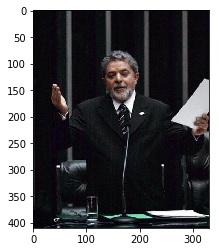

In [170]:
plt.imshow(convert_to_rgb(img1))

In [171]:
print(len(faces))

1


In [172]:
for (x,y,w,h) in faces:
    print(x,y,w,h)
    cv2.rectangle(img1,(x,y),(x+w,y+h),(0,255,0),2)

128 94 68 68


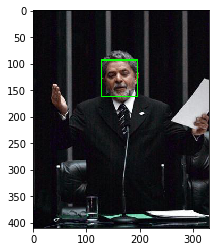

In [173]:
plt.imshow(convert_to_rgb(img1))

...but in others it does not

In [175]:
#for face in accum_imgs:
img2 = cv2.imread(accum_imgs[0])
img2_grey = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
faces = faceDetector.detectMultiScale(img2_grey, 1.3, 5)

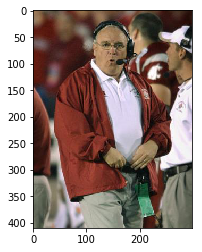

In [176]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [177]:
print(len(faces))

0


Check how often faces are correctly identified

In [146]:
shuffled = sorted(accum_imgs, key=lambda k: np.random.random())
idx = int(np.floor(0.8*len(shuffled)))
training_imgs = shuffled[0:idx]
test_imgs = shuffled[idx:]
print(len(training_imgs)+len(test_imgs))

5267


Who:  George W. Bush
Number of faces found: 0


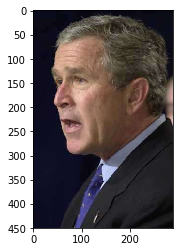

In [195]:
#for im in training_imgs:
im3_path=training_imgs[5]
title="03/"+im3_path[12:-4]
print("Who: ",captions[title])
img3 = cv2.imread(im3_path)
img3_grey = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
faces = faceDetector.detectMultiScale(img3_grey, 1.3, 5)
print("Number of faces found: %d"%len(faces))
plt.imshow(convert_to_rgb(img3))

Our model doesn't predict <i>who</i> is in the photos at this stage, but we can still count how many faces should be identified

Who:  Leonardo DiCaprio
Number of faces found: 1
5 80 163 163


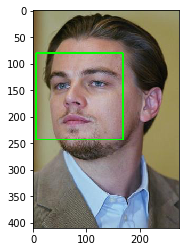

In [196]:
im4_path=training_imgs[106]
title="03/"+im4_path[12:-4]
print("Who: ",captions[title])
img4 = cv2.imread(im4_path)
img4_grey = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)
faces = faceDetector.detectMultiScale(img4_grey, 1.3, 5)
print("Number of faces found: %d"%len(faces))
for (x,y,w,h) in faces:
    print(x,y,w,h)
    cv2.rectangle(img4,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(convert_to_rgb(img4))

Who:  Prime Minister Jose Maria Aznar
Number of faces found: 2
24 80 109 109
136 149 114 114


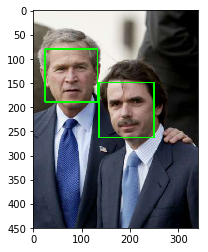

In [227]:
im5_path=training_imgs[500]
title="03/"+im5_path[12:-4]
print("Who: ",captions[title])
img5 = cv2.imread(im5_path)
img5_grey = cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY)
faces = faceDetector.detectMultiScale(img5_grey, 1.3, 5)
print("Number of faces found: %d"%len(faces))
for (x,y,w,h) in faces:
    print(x,y,w,h)
    cv2.rectangle(img5,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(convert_to_rgb(img5))

Problem: we have only dealt with one name cases but many photos contain >1 subject. Another notebook will be opened to figure this out.